# Project AI

## Project Modelling

## Dense121

In [122]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import time
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [123]:
# Path to the training, validation, and test datasets
train_path = 'C:/Users/VICTUS/Documents/AI Project/train'
valid_path = 'C:/Users/VICTUS/Documents/AI Project/valid'
test_path = 'C:/Users/VICTUS/Documents/AI Project/test'

In [124]:
train_batches1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10)
valid_batches1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10)
test_batches1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10, shuffle=False)

Found 9652 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [125]:
assert train_batches1.n == 9652
assert valid_batches1.n == 180
assert test_batches1.n == 450
assert train_batches1.num_classes == valid_batches1.num_classes == test_batches1.num_classes == 9

In [126]:

imgs , labels = next(train_batches1)

In [212]:
def plotImages(images_arr1):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr1,axes):
        ax.imshow(img.astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

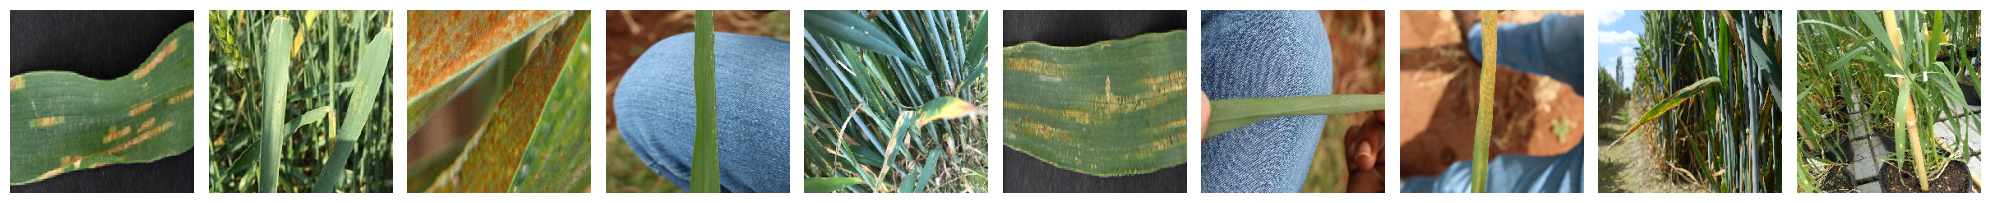

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [213]:
plotImages(imgs)
print(labels)

In [131]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model.trainable = False

model1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(units=9, activation='softmax'),
])

In [132]:
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           9,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,046,729 (26.88 MB)

 Trainable params: 9,225 (36.04 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [138]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [139]:
start_time = time.time()

history1 = model1.fit(train_batches1, validation_data = valid_batches1, epochs =50, verbose = 2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f}seconds")

C:\Users\VICTUS\anaconda3\envs\alif\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
966/966 - 567s - 587ms/step - accuracy: 0.4491 - loss: 1.6176 - val_accuracy: 0.4778 - val_loss: 1.7205
Epoch 2/50
966/966 - 431s - 446ms/step - accuracy: 0.6979 - loss: 0.9809 - val_accuracy: 0.5333 - val_loss: 1.5849
Epoch 3/50
966/966 - 428s - 443ms/step - accuracy: 0.7517 - loss: 0.7966 - val_accuracy: 0.5444 - val_loss: 1.5457
Epoch 4/50
966/966 - 428s - 443ms/step - accuracy: 0.7796 - loss: 0.6984 - val_accuracy: 0.5667 - val_loss: 1.5171
Epoch 5/50
966/966 - 429s - 444ms/step - accuracy: 0.8029 - loss: 0.6333 - val_accuracy: 0.5778 - val_loss: 1.4822
Epoch 6/50
966/966 - 426s - 441ms/step - accuracy: 0.8184 - loss: 0.5874 - val_accuracy: 0.6111 - val_loss: 1.4119
Epoch 7/50
966/966 - 424s - 439ms/step - accuracy: 0.8257 - loss: 0.5507 - val_accuracy: 0.6167 - val_loss: 1.4283
Epoch 8/50
966/966 - 426s - 441ms/step - accuracy: 0.8364 - loss: 0.5217 - val_accuracy: 0.6444 - val_loss: 1.4034
Epoch 9/50
966/966 - 427s - 442ms/step - accuracy: 0.8447 - loss: 0.4971 - val_a

In [182]:
def mean_average_precision1(y_true1, y_pred1):
    y_pred1 = np.argmax(y_pred1, axis=1)
    y_true1 = test_batches1.labels

    precisions1 = []
    for class_id1 in np.unique(y_true1):
        true_positives1 = np.sum((y_pred1 == class_id1) & (y_true1 == class_id1))
        false_positives1 = np.sum((y_pred1 == class_id1) & (y_true1 != class_id1))
        false_negatives1 = np.sum((y_pred1 != class_id1) & (y_true1 == class_id1))

        precision1 = true_positives1 / (true_positives1 + false_positives1 + 1e-10)
        recall1 = true_positives1 / (true_positives1 + false_negatives1 + 1e-10)
        precisions1.append(precision1 * recall1)

    return np.mean(precisions1)

test_batches1.reset() 
y_pred1 = model1.predict(test_batches1) 
y_true1 = test_batches1.labels

map_score1 = mean_average_precision1(y_true1, y_pred1)
print(f"Mean Average Precision (mAP): {map_score1:.4f}")

test_loss1, test_accuracy1 = model1.evaluate(test_batches1, verbose=2)
print(f"Test Accuracy: {test_accuracy1:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 439ms/step
Mean Average Precision (mAP): 0.6187
45/45 - 20s - 436ms/step - accuracy: 0.7622 - loss: 1.5098
Test Accuracy: 0.7622


## ResNet50 

In [55]:
!pip install tensorflow-addons

   ---------------------------------------- 0.0/729.9 kB ? eta -:--:--
   -------------- ------------------------- 262.1/729.9 kB ? eta -:--:--
   ---------------------------------------- 729.9/729.9 kB 2.5 MB/s eta 0:00:00


In [168]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import time
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [169]:
# Path to the training, validation, and test datasets
train_path = 'C:/Users/VICTUS/Documents/AI Project/train'
valid_path = 'C:/Users/VICTUS/Documents/AI Project/valid'
test_path = 'C:/Users/VICTUS/Documents/AI Project/test'

In [170]:
train_batches2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10)
valid_batches2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10)
test_batches2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10, shuffle=False)

Found 9652 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [171]:
assert train_batches2.n == 9652
assert valid_batches2.n == 180
assert test_batches2.n == 450
assert train_batches2.num_classes == valid_batches2.num_classes == test_batches2.num_classes == 9

In [172]:

imgs , labels = next(train_batches2)

In [206]:
def plotImages(images_arr2):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr2,axes):
        ax.imshow(img.astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

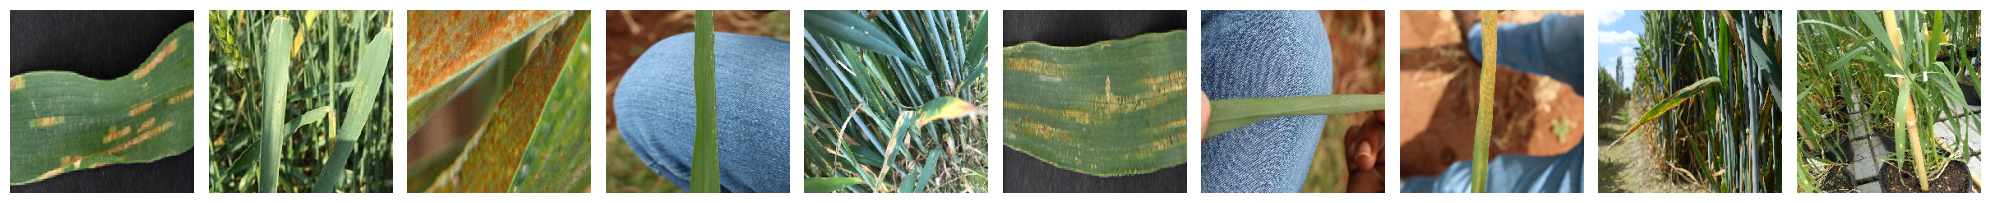

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [207]:
plotImages(imgs)
print(labels)

In [175]:
base_model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model2.trainable = False

model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(units=256,activation='relu'),
    Dropout(0.5),
    Dense(units=9, activation='softmax'),
])

In [176]:
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,569 (91.99 MB)

 Trainable params: 526,857 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [177]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [178]:
start_time2 = time.time()

history2 = model2.fit(train_batches2, validation_data = valid_batches2, epochs =50, verbose = 2)

end_time2 = time.time()
training_time2 = end_time2 - start_time2
print(f"Training time: {training_time2:.2f}seconds")

C:\Users\VICTUS\anaconda3\envs\alif\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
966/966 - 483s - 500ms/step - accuracy: 0.6477 - loss: 1.0558 - val_accuracy: 0.6611 - val_loss: 1.4657
Epoch 2/50
966/966 - 467s - 484ms/step - accuracy: 0.8058 - loss: 0.5829 - val_accuracy: 0.7000 - val_loss: 1.3221
Epoch 3/50
966/966 - 467s - 484ms/step - accuracy: 0.8526 - loss: 0.4402 - val_accuracy: 0.7778 - val_loss: 1.3559
Epoch 4/50
966/966 - 467s - 484ms/step - accuracy: 0.8770 - loss: 0.3730 - val_accuracy: 0.7611 - val_loss: 1.3098
Epoch 5/50
966/966 - 467s - 483ms/step - accuracy: 0.8969 - loss: 0.3095 - val_accuracy: 0.8056 - val_loss: 1.2903
Epoch 6/50
966/966 - 454s - 470ms/step - accuracy: 0.9111 - loss: 0.2654 - val_accuracy: 0.7944 - val_loss: 1.5409
Epoch 7/50
966/966 - 466s - 483ms/step - accuracy: 0.9196 - loss: 0.2394 - val_accuracy: 0.8167 - val_loss: 1.2948
Epoch 8/50
966/966 - 465s - 481ms/step - accuracy: 0.9303 - loss: 0.2095 - val_accuracy: 0.8278 - val_loss: 1.3776
Epoch 9/50
966/966 - 466s - 482ms/step - accuracy: 0.9349 - loss: 0.1952 - val_a

In [183]:
def mean_average_precision2(y_true2, y_pred2):
    y_pred2 = np.argmax(y_pred2, axis=1)
    y_true2 = test_batches2.labels

    precisions2 = []
    for class_id2 in np.unique(y_true2):
        true_positives2 = np.sum((y_pred2 == class_id2) & (y_true2 == class_id2))
        false_positives2 = np.sum((y_pred2 == class_id2) & (y_true2 != class_id2))
        false_negatives2 = np.sum((y_pred2 != class_id2) & (y_true2 == class_id2))

        precision2 = true_positives2 / (true_positives2 + false_positives2 + 1e-10)
        recall2 = true_positives2 / (true_positives2 + false_negatives2 + 1e-10)
        precisions2.append(precision2 * recall2)

    return np.mean(precisions2)

test_batches2.reset() 
y_pred2 = model2.predict(test_batches2) 
y_true2 = test_batches2.labels

map_score2 = mean_average_precision2(y_true2, y_pred2)
print(f"Mean Average Precision (mAP): {map_score2:.4f}")

test_loss2, test_accuracy2 = model2.evaluate(test_batches2, verbose=2)
print(f"Test Accuracy: {test_accuracy2:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 468ms/step
Mean Average Precision (mAP): 0.8099
45/45 - 21s - 472ms/step - accuracy: 0.8800 - loss: 2.3095
Test Accuracy: 0.8800


## MobileNetv3

In [184]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import time
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [185]:
# Path to the training, validation, and test datasets
train_path = 'C:/Users/VICTUS/Documents/AI Project/train'
valid_path = 'C:/Users/VICTUS/Documents/AI Project/valid'
test_path = 'C:/Users/VICTUS/Documents/AI Project/test'

In [186]:
train_batches3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10)
valid_batches3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10)
test_batches3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust'], batch_size = 10, shuffle=False)

Found 9652 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [187]:
assert train_batches3.n == 9652
assert valid_batches3.n == 180
assert test_batches3.n == 450
assert train_batches3.num_classes == valid_batches3.num_classes == test_batches3.num_classes == 9

In [188]:

imgs , labels = next(train_batches3)

In [208]:
def plotImages(images_arr3):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr3,axes):
        ax.imshow(img.astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

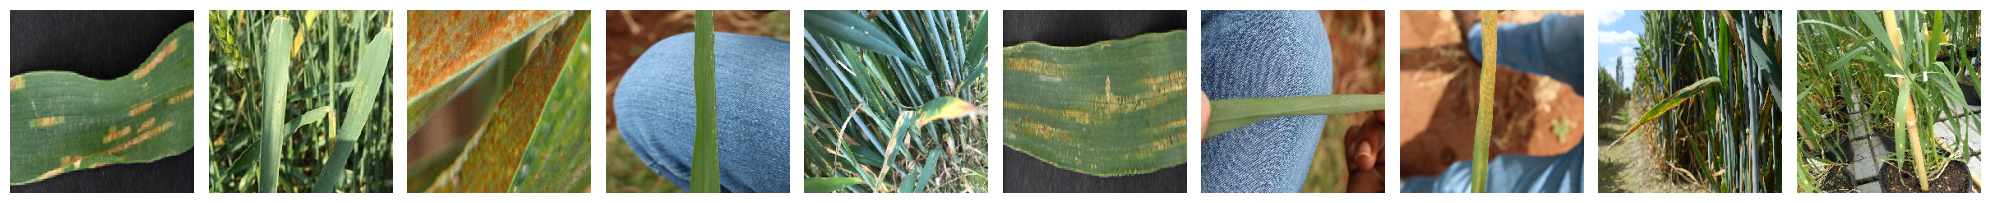

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [209]:
plotImages(imgs)
print(labels)

In [214]:
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model.trainable = False

model3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(units=9, activation='softmax'),
])

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [215]:
model3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 9)                   │           5,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944,313 (3.60 MB)

 Trainable params: 5,193 (20.29 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [216]:
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [217]:
start_time = time.time()

history3 = model3.fit(train_batches3, validation_data = valid_batches3, epochs =50, verbose = 2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f}seconds")

C:\Users\VICTUS\anaconda3\envs\alif\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
966/966 - 305s - 315ms/step - accuracy: 0.2770 - loss: 2.1685 - val_accuracy: 0.4000 - val_loss: 1.7138
Epoch 2/50
966/966 - 188s - 194ms/step - accuracy: 0.4797 - loss: 1.5265 - val_accuracy: 0.4667 - val_loss: 1.5266
Epoch 3/50
966/966 - 188s - 194ms/step - accuracy: 0.5793 - loss: 1.2573 - val_accuracy: 0.5056 - val_loss: 1.4360
Epoch 4/50
966/966 - 188s - 195ms/step - accuracy: 0.6230 - loss: 1.1221 - val_accuracy: 0.5278 - val_loss: 1.3844
Epoch 5/50
966/966 - 188s - 195ms/step - accuracy: 0.6538 - loss: 1.0334 - val_accuracy: 0.5389 - val_loss: 1.3639
Epoch 6/50
966/966 - 190s - 197ms/step - accuracy: 0.6773 - loss: 0.9720 - val_accuracy: 0.5611 - val_loss: 1.3184
Epoch 7/50
966/966 - 191s - 198ms/step - accuracy: 0.6931 - loss: 0.9255 - val_accuracy: 0.5833 - val_loss: 1.2920
Epoch 8/50
966/966 - 188s - 194ms/step - accuracy: 0.7036 - loss: 0.8871 - val_accuracy: 0.6056 - val_loss: 1.2654
Epoch 9/50
966/966 - 177s - 183ms/step - accuracy: 0.7117 - loss: 0.8643 - val_a

In [218]:
def mean_average_precision3(y_true3, y_pred3):
    y_pred3 = np.argmax(y_pred3, axis=1)
    y_true3 = test_batches3.labels

    precisions3 = []
    for class_id3 in np.unique(y_true3):
        true_positives3 = np.sum((y_pred3 == class_id3) & (y_true3 == class_id3))
        false_positives3 = np.sum((y_pred3 == class_id3) & (y_true3 != class_id3))
        false_negatives3 = np.sum((y_pred3 != class_id3) & (y_true3 == class_id3))

        precision3 = true_positives3 / (true_positives3 + false_positives3 + 1e-10)
        recall3 = true_positives3 / (true_positives3 + false_negatives3 + 1e-10)
        precisions3.append(precision3 * recall3)

    return np.mean(precisions3)

test_batches3.reset() 
y_pred3 = model3.predict(test_batches3) 
y_true3 = test_batches3.labels

map_score3 = mean_average_precision3(y_true3, y_pred3)
print(f"Mean Average Precision (mAP): {map_score3:.4f}")

test_loss3, test_accuracy3 = model3.evaluate(test_batches3, verbose=2)
print(f"Test Accuracy: {test_accuracy3:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step
Mean Average Precision (mAP): 0.4340
45/45 - 4s - 90ms/step - accuracy: 0.6356 - loss: 1.2426
Test Accuracy: 0.6356


# Data Visualisation

## Model Accuracy

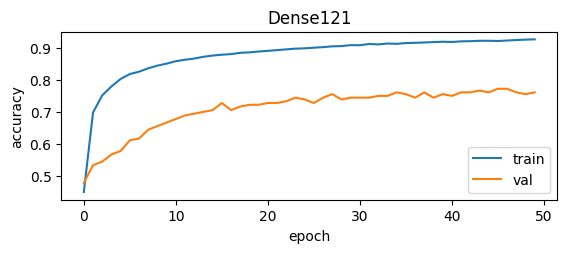

In [222]:
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Dense121')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

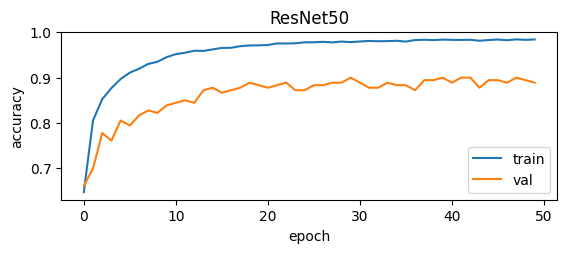

In [223]:
plt.subplot(2,1,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('ResNet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

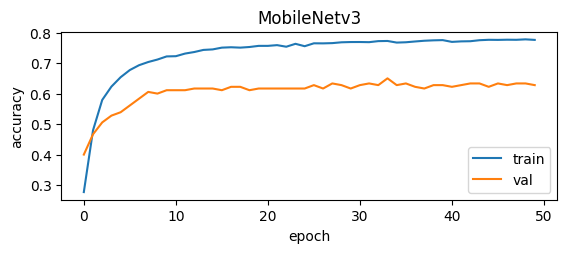

In [224]:
plt.subplot(2,1,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('MobileNetv3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

## Training Loss

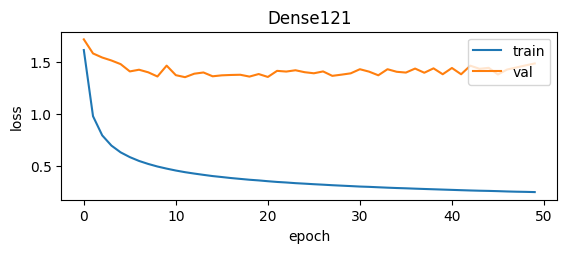

In [226]:
plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Dense121')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

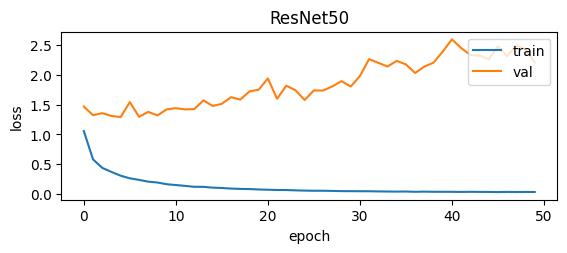

In [225]:
plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('ResNet50')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

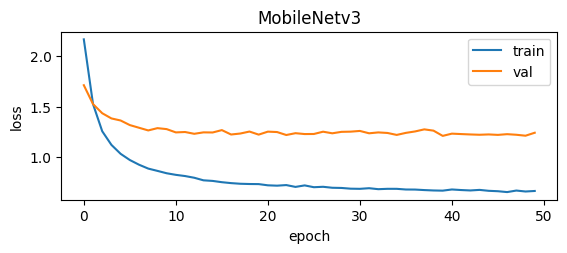

In [227]:
plt.subplot(2,1,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('MobileNetv3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

### Dense121

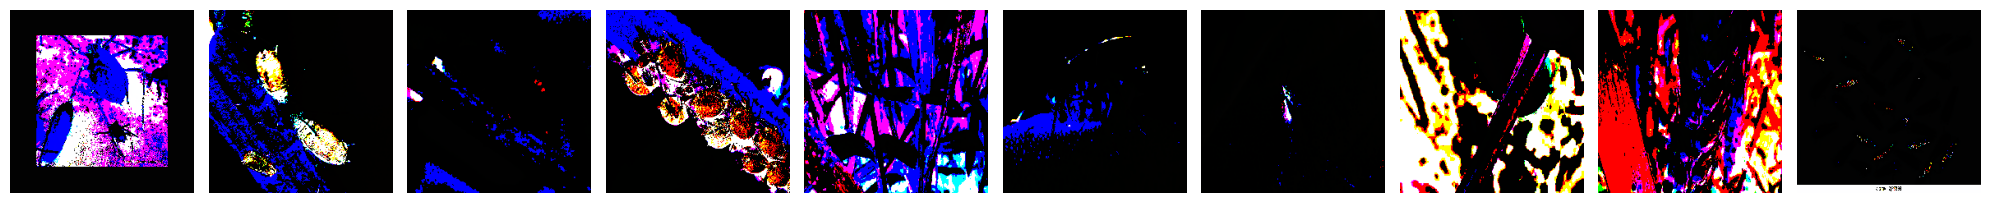

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [232]:
test_imgs, test_labels = next(test_batches1)
plotImages(test_imgs)
print(test_labels)

### ResNet50

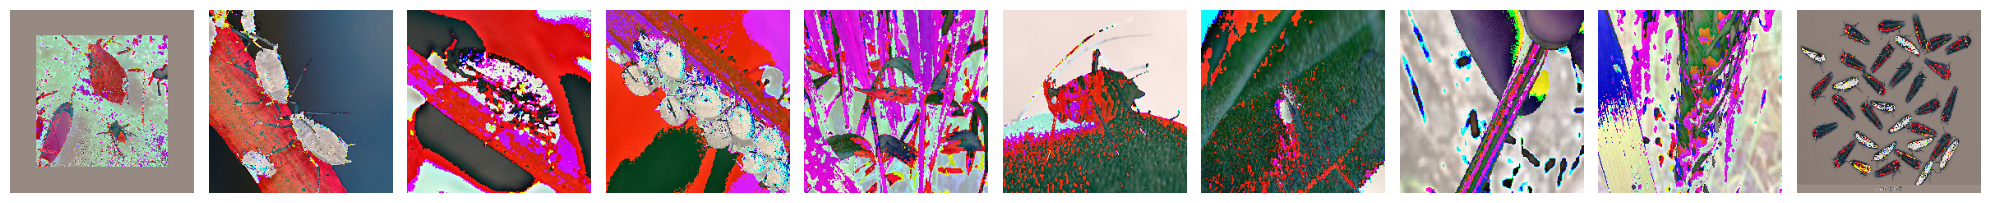

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [231]:
test_imgs, test_labels = next(test_batches2)
plotImages(test_imgs)
print(test_labels)

### MobileNetv3

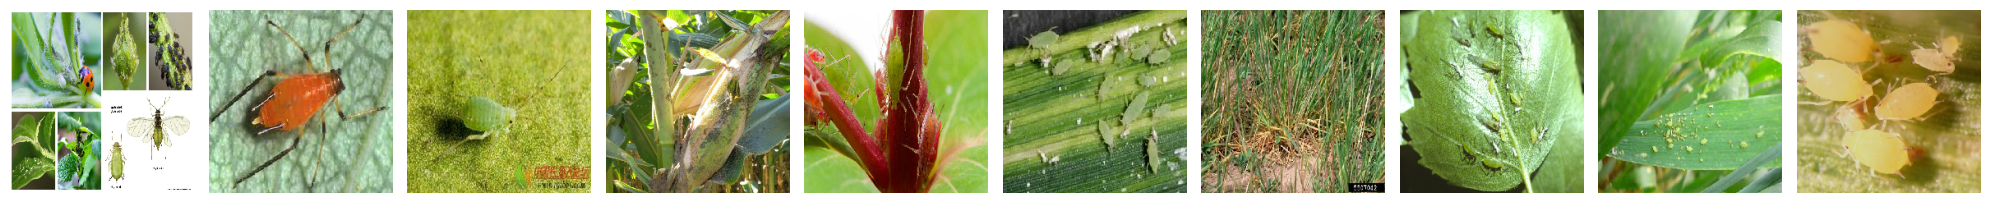

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [230]:
test_imgs, test_labels = next(test_batches3)
plotImages(test_imgs)
print(test_labels)

### Dense121

In [233]:
test_batches1.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

### ResNet50

In [234]:
test_batches2.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

### MobileNetv3

In [235]:
test_batches3.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

### Dense121

In [244]:
predictions1 = model1.predict(x=test_batches1, verbose=0)

In [245]:
np.round(predictions1)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### ResNet50

In [246]:
predictions2 = model2.predict(x=test_batches2, verbose=0)

In [247]:
np.round(predictions2)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### MobileNetv3

In [248]:
predictions3 = model3.predict(x=test_batches3, verbose=0)

In [249]:
np.round(predictions3)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Confusion Matrix

### Dense121

In [260]:
cm1 = confusion_matrix(y_true=test_batches1.classes, y_pred=np.argmax(predictions1, axis = -1))

In [270]:
def plot_confusion_matrix(cm1,classes,
                         normalize = False, title = 'Dense121',
                         cmap=plt.cm.Blues):
    plt.imshow(cm1, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm1 = cm1.astype('float')/cm1.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm1)
    thresh = cm1.max()/2.
    for i,j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
        plt.text(j,i, cm1[i,j],
                horizontalalignment='center',
                color='white' if cm1[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [265]:
test_batches1.class_indices

{'Aphid': 0,
 'Brown Rust': 1,
 'Healthy': 2,
 'Leaf Blight': 3,
 'Mildew': 4,
 'Mite': 5,
 'Septoria': 6,
 'Smut': 7,
 'Yellow Rust': 8}

Confusion matrix, without normalization
[[45  0  1  3  0  0  0  1  0]
 [ 0 27  3  0  4  0  3  0 13]
 [ 0  0  4  0  1  0  0  2 43]
 [ 1  2  0 43  0  0  1  1  2]
 [ 0  1  1  4 44  0  0  0  0]
 [ 1  2  0  8  3 32  0  3  1]
 [ 0  0  0  1  0  0 49  0  0]
 [ 1  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0 50]]


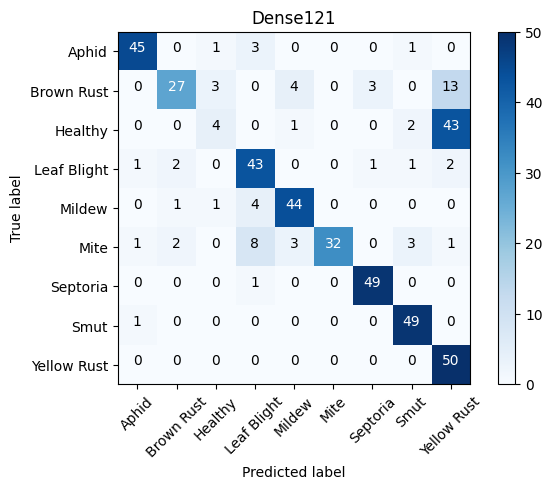

In [272]:
cm_plot_labels = ['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust']
plot_confusion_matrix(cm1=cm1, classes=cm_plot_labels, title='Dense121')

In [296]:
loss,acc = model1.evaluate(test_imgs, test_labels, batch_size=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.8000 - loss: 0.4154


### ResNet50

In [255]:
cm2 = confusion_matrix(y_true=test_batches2.classes, y_pred=np.argmax(predictions2, axis = -1))

In [273]:
def plot_confusion_matrix(cm2,classes,
                         normalize = False, title = 'ResNet50',
                         cmap=plt.cm.Blues):
    plt.imshow(cm2, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm2 = cm2.astype('float')/cm2.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm2)
    thresh = cm2.max()/2.
    for i,j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
        plt.text(j,i, cm2[i,j],
                horizontalalignment='center',
                color='white' if cm2[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [274]:
test_batches2.class_indices

{'Aphid': 0,
 'Brown Rust': 1,
 'Healthy': 2,
 'Leaf Blight': 3,
 'Mildew': 4,
 'Mite': 5,
 'Septoria': 6,
 'Smut': 7,
 'Yellow Rust': 8}

Confusion matrix, without normalization
[[50  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  3]
 [ 1  0  4  0  0  0  0  2 43]
 [ 1  0  0 49  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0]
 [ 1  0  0  0  0 49  0  0  0]
 [ 0  0  0  3  0  0 47  0  0]
 [ 0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0 50]]


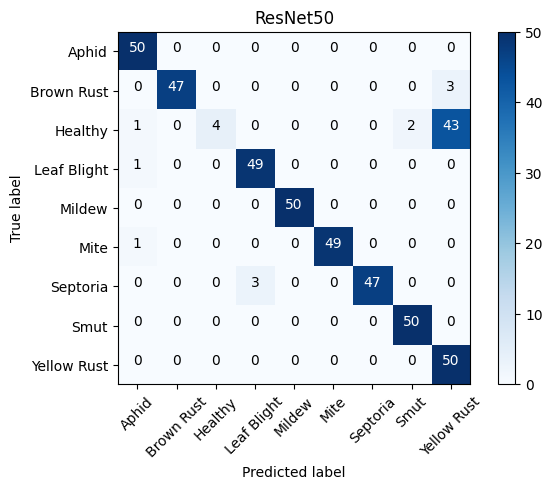

In [275]:
cm_plot_labels = ['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust']
plot_confusion_matrix(cm2=cm2, classes=cm_plot_labels, title='ResNet50')

In [295]:
loss,acc = model2.evaluate(test_imgs, test_labels, batch_size=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 0.2000 - loss: 2.8856


### MobileNetv3

In [280]:
cm3 = confusion_matrix(y_true=test_batches3.classes, y_pred=np.argmax(predictions3, axis = -1))

In [284]:
def plot_confusion_matrix(cm3,classes,
                         normalize = False, title = 'MobileNetv3',
                         cmap=plt.cm.Blues):
    plt.imshow(cm3, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm3 = cm3.astype('float')/cm3.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm3)
    thresh = cm3.max()/2.
    for i,j in itertools.product(range(cm3.shape[0]), range(cm3.shape[1])):
        plt.text(j,i, cm3[i,j],
                horizontalalignment='center',
                color='white' if cm3[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [282]:
test_batches3.class_indices

{'Aphid': 0,
 'Brown Rust': 1,
 'Healthy': 2,
 'Leaf Blight': 3,
 'Mildew': 4,
 'Mite': 5,
 'Septoria': 6,
 'Smut': 7,
 'Yellow Rust': 8}

Confusion matrix, without normalization
[[35  2  1  5  0  5  0  2  0]
 [ 0 16 15  0  2  0 14  0  3]
 [ 0  0  3  0  0  0  0  4 43]
 [ 2  3  1 32  2  0  5  1  4]
 [ 1  5  5  5 29  1  4  0  0]
 [ 8  2  0  8  2 26  0  3  1]
 [ 0  1  0  1  0  0 47  1  0]
 [ 2  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0  0 50]]


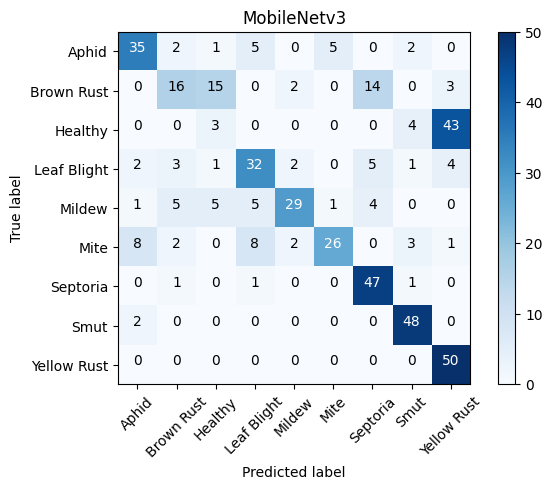

In [285]:
cm_plot_labels = ['Aphid','Brown Rust','Healthy','Leaf Blight','Mildew','Mite','Septoria','Smut','Yellow Rust']
plot_confusion_matrix(cm3=cm3, classes=cm_plot_labels, title='MobileNetv3')

In [297]:
loss,acc = model3.evaluate(test_imgs, test_labels, batch_size=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0000e+00 - loss: 2.9003


# Conclusion

# Model Performance Comparison

| Model       | Training Time | mAP   | Accuracy | Loss  |
|-------------|--------------|-------|----------|-------|
| DenseNet121 | 21383.66s (6 hours) | 0.6187 | 0.7622   | 1.5098 |
| ResNet50    | 23094.70s (6.41 hours) | 0.8099 | 0.8800   | 2.3905 |
| MobileNetV3 | 9346.56s (2 hours) | 0.4340 | 0.6356   | 1.2426 |

## Performance Summary

- **Best Overall Model: ResNet50**
  - Highest mAP and accuracy, making it the most effective for the dataset.
  - Despite the higher loss, its superior accuracy and mAP indicate better pattern recognition.

- **DenseNet121:** 
  - Provides moderate performance, balancing training time and accuracy.

- **MobileNetV3:** 
  - Fastest and most computationally efficient, ideal for resource-constrained environments but not suitable for high-accuracy requirements.

## Considerations

- **Efficiency:**  
  - MobileNetV3 excels in speed but lacks accuracy.
  - DenseNet121 and ResNet50 require more computational resources but achieve better accuracy.

- **Overfitting in ResNet50:**  
  - The higher loss might indicate overfitting, where the model memorizes training data but struggles with generalization.
